# This code is trial for getting one day prediction at a time and increase the training set after that 


# Import Libraries


In [96]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import RobustScaler
from keras.models import load_model

# Check for GPU 


In [97]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


# GPU Configuration
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
        print("GPU memory growth enabled")
    except RuntimeError as e:
        print(e)
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force CPU usage


GPU memory growth enabled


# Hyperparameter


In [98]:

split = 0.85
sequence_length = 60
epochs = 50
learning_rate = 0.0001

In [5]:
# Define buffer size (number of past samples to keep)
buffer_size = sequence_length  

# Initialize empty buffers
data_buffer_X = []  # Stores input features
data_buffer_y = []  # Stores target values (labels)


# Loading stock price data

In [6]:
# stock_data = pd.read_csv("stock_price.csv")
stock_data = pd.read_csv("gold_price.csv")
column = ['Close']
columns_to_load = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


# Data preparation

In [7]:
len_stock_data = stock_data.shape[0]
train_examples = int(len_stock_data * split)

train = stock_data.get(column).values[:train_examples]
test = stock_data.get(column).values[train_examples:]

len_train = train.shape[0]
len_test = test.shape[0]

# EMA SCALER



In [8]:
# import numpy as np

# class EMAScaler:
#     def __init__(self, alpha=0.1):
#         """
#         Initialize the Exponential Moving Average Scaler.
#         :param alpha: Smoothing factor (0 < alpha <= 1). Higher values give more weight to recent data.
#         """
#         self.alpha = alpha
#         self.mean = None
#         self.var = None

#     def partial_fit(self, X):
#         """
#         Update the scaler with new data.
#         :param X: New data (numpy array or similar).
#         """
#         mean_new = np.mean(X, axis=0)
#         var_new = np.var(X, axis=0)

#         if self.mean is None:
#             self.mean = mean_new
#             self.var = var_new
#         else:
#             self.mean = self.alpha * mean_new + (1 - self.alpha) * self.mean
#             self.var = self.alpha * var_new + (1 - self.alpha) * self.var

#     def transform(self, X):
#         """
#         Scale the input data using the current mean and variance.
#         :param X: Data to be scaled.
#         :return: Scaled data.
#         """
#         return (X - self.mean) / np.sqrt(self.var + 1e-8)

#     def fit_transform(self, X):
#         """
#         Update the scaler and transform the data in one step.
#         :param X: Data to be scaled.
#         :return: Scaled data.
#         """
#         self.partial_fit(X)
#         return self.transform(X)

# Scaling with EMA scaler


In [9]:
# scaler = EMAScaler(alpha=0.1)
# train_scaled = scaler.fit_transform(train.reshape(-1, 1))
# test_scaled = scaler.transform(test.reshape(-1, 1))

In [10]:
# train_scaled = np.log1p(train.reshape(-1, 1))
# test_scaled = np.log1p(test.reshape(-1, 1))
# scaler = RobustScaler()
# scaler.fit(train)  

# scaled_train = scaler.transform(train)
# scaled_test = scaler.transform(test)

# train_scaled = train/1e5
# test_scaled = test/1e5
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.partial_fit(train)
# train_scaled = scaler.transform(train)
# test_scaled = scaler.transform(test)




# Initialize and fit scaler

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))


In [12]:
print(train_scaled[0:len_train])
print(test_scaled[0:len_test])

[[0.67359159]
 [0.74168946]
 [0.76546611]
 [0.69759903]
 [0.66389641]
 [0.47576164]
 [0.52770069]
 [0.54847631]
 [0.49930723]
 [0.48245606]
 [0.41920578]
 [0.52493072]
 [0.56532775]
 [0.54132031]
 [0.56394249]
 [0.54339793]
 [0.51823629]
 [0.51477369]
 [0.51154187]
 [0.56832851]
 [0.55216969]
 [0.49492149]
 [0.48891942]
 [0.4014312 ]
 [0.45221605]
 [0.51131109]
 [0.51292686]
 [0.50807927]
 [0.47229903]
 [0.46283464]
 [0.38180978]
 [0.35941811]
 [0.33217913]
 [0.37765454]
 [0.43674958]
 [0.42797782]
 [0.41805158]
 [0.34095089]
 [0.26939042]
 [0.2054478 ]
 [0.25300082]
 [0.19875337]
 [0.16204972]
 [0.19459814]
 [0.1518927 ]
 [0.21514297]
 [0.2428438 ]
 [0.22045241]
 [0.25184662]
 [0.25831026]
 [0.26523547]
 [0.28947369]
 [0.28116322]
 [0.27100647]
 [0.24076618]
 [0.24722982]
 [0.2592334 ]
 [0.23291784]
 [0.21168037]
 [0.20914118]
 [0.14612169]
 [0.19944601]
 [0.24815324]
 [0.24584483]
 [0.28231742]
 [0.26685124]
 [0.3010157 ]
 [0.27793168]
 [0.26177287]
 [0.27908588]
 [0.27631563]
 [0.34

In [13]:
print("Last 10 data of train set ")
print(train_scaled[-10:])
print("\n\n\first 10 data of test set ")
print(test_scaled[:10])
print("\n\n\n")

Last 10 data of train set 
[[0.67636184]
 [0.69990743]
 [0.70313925]
 [0.7199907 ]
 [0.78647252]
 [0.78023994]
 [0.77008292]
 [0.80424738]
 [0.82317617]
 [0.81555833]]


irst 10 data of test set 
[[0.78808857]
 [0.79616797]
 [0.76777451]
 [0.79824531]
 [0.75023071]
 [0.7504615 ]
 [0.78208649]
 [0.79524456]
 [0.75715592]
 [0.72437644]]






# Prepare training data



In [14]:
X_train = []
y_train = []
for i in range(len_train - sequence_length):
    X_train.append(train_scaled[i:i + sequence_length].flatten())
    y_train.append(train_scaled[i + sequence_length])
X_train = np.array(X_train)
y_train = np.array(y_train)

# data_buffer_X.append(X_train[0:9])

# data_buffer_y.append(y_train[0:9])

In [15]:
print(X_train[-1])
print(y_train[-1])
print("\n\n\n")

[0.83310241 0.86634317 0.87119104 0.85457038 0.8460294  0.83033216
 0.86403477 0.91574304 0.98014752 0.98337934 0.92820847 0.93767286
 0.95083092 0.95498588 0.90974125 0.90812548 0.84949201 0.83841156
 0.77585392 0.78393333 0.83125557 0.81255757 0.81948278 0.74492128
 0.75669407 0.74399786 0.77977809 0.7913201  0.82340695 0.7550783
 0.78578016 0.78162493 0.74515206 0.79570612 0.7832407  0.78531831
 0.75207727 0.74168946 0.78716515 0.78070151 0.72760826 0.69159724
 0.68859621 0.69829166 0.70775606 0.67382266 0.66828244 0.6652814
 0.68674965 0.69967665 0.66689745 0.67636184 0.69990743 0.70313925
 0.7199907  0.78647252 0.78023994 0.77008292 0.80424738 0.82317617]
[0.81555833]






# Prepare test data



In [16]:
X_test = []
y_test = []
for i in range(len_test - sequence_length):
    X_test.append(test_scaled[i:i + sequence_length].flatten())
    y_test.append(test_scaled[i + sequence_length])
X_test = np.array(X_test)
y_test = np.array(y_test)

In [17]:
print(X_test[:1])
print(y_test[:1])
print("\n\n\n")

[[0.78808857 0.79616797 0.76777451 0.79824531 0.75023071 0.7504615
  0.78208649 0.79524456 0.75715592 0.72437644 0.72599249 0.74007369
  0.71860543 0.70406267 0.69413643 0.67543843 0.66689745 0.65927961
  0.65581701 0.63088615 0.62650041 0.63065537 0.63296377 0.6675898
  0.69159724 0.69113567 0.68120943 0.68674965 0.72853168 0.74792231
  0.76084931 0.72483829 0.70106163 0.68605702 0.70083085 0.69852245
  0.69344408 0.66920585 0.6523544  0.69967665 0.71052603 0.72391487
  0.75069228 0.70083085 0.70406267 0.68374862 0.65697121 0.57987052
  0.58887334 0.56301935 0.51638946 0.47229903 0.46491226 0.47530007
  0.45844862 0.51269607 0.5461679  0.57502293 0.58702651 0.59349015]]
[[0.66943664]]






# Store original y_test values for evaluation


In [18]:
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


In [19]:
# y_test_original = np.expm1(y_test.reshape(-1, 1))
# y_test_original = y_test*1e5
# y_test_original = scaler.inverse_transform(y_test)


# XAU_USD15 DATASET


In [157]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from joblib import dump, load

# Load the new dataset
stock_data = pd.read_csv("XAU_15m_data.csv", delimiter=";")

# Convert the 'Date' column to datetime format
# stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y.%m.%d %H:%M')

# # Sort the data by date (if not already sorted)
# stock_data = stock_data.sort_values(by='Date')

# Extract only the 'Close' column
close_prices = stock_data['Close'].values.reshape(-1, 1)  # Reshape to 2D array for scaling

# Split the data into training and testing sets
split = 0.8  # Example value, adjust as needed
len_stock_data = len(close_prices)
train_examples = int(len_stock_data * split)

train = close_prices[:train_examples]
test = close_prices[train_examples:]

len_train = len(train)
len_test = len(test)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Save the scaler
dump(scaler, 'scaler.joblib')



# # Define sequence length (same as in the original code)
# sequence_length = 60  # Example value, adjust as needed

# Create sequences for training data
X_train = []
y_train = []
for i in range(len_train - sequence_length):
    X_train.append(train_scaled[i:i + sequence_length].flatten())  # Flatten the sequence
    y_train.append(train_scaled[i + sequence_length])
X_train = np.array(X_train)
y_train = np.array(y_train)

# Create sequences for testing data
X_test = []
y_test = []
for i in range(len_test - sequence_length):
    X_test.append(test_scaled[i:i + sequence_length].flatten())  # Flatten the sequence
    y_test.append(test_scaled[i + sequence_length])
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test[-1])
print("========")
print(scaler.inverse_transform(X_test[-1].reshape(-1, 1)))

# Inverse transform for original values (if needed)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

[1.42961261 1.43187429 1.43076122 1.43092699 1.43082042 1.42841073
 1.42852322 1.42807325 1.42891398 1.42882517 1.42886069 1.42826863
 1.4278009  1.42854098 1.42725028 1.42862979 1.42919817 1.42998561
 1.43031717 1.4321348  1.43312355 1.43518984 1.43622003 1.43542075
 1.43481092 1.43485829 1.43624964 1.43581743 1.43537931 1.43656935
 1.43752257 1.43935205 1.44128217 1.43770019 1.43875406 1.43746929
 1.43781268 1.43607794 1.43630292 1.43632661 1.43583519 1.43665816
 1.4401987  1.43720878 1.43523129 1.43167299 1.43330709 1.43137696
 1.43256109 1.4331117  1.4300981  1.42983168 1.4304415  1.43030533
 1.43125855 1.43254332 1.43317091 1.43301105 1.43169667 1.43156642]
[[2795.93]
 [2799.75]
 [2797.87]
 [2798.15]
 [2797.97]
 [2793.9 ]
 [2794.09]
 [2793.33]
 [2794.75]
 [2794.6 ]
 [2794.66]
 [2793.66]
 [2792.87]
 [2794.12]
 [2791.94]
 [2794.27]
 [2795.23]
 [2796.56]
 [2797.12]
 [2800.19]
 [2801.86]
 [2805.35]
 [2807.09]
 [2805.74]
 [2804.71]
 [2804.79]
 [2807.14]
 [2806.41]
 [2805.67]
 [2807.68]

# Direction Accuracy Method


In [21]:
def calculate_direction_accuracy(actual_values, predicted_values):
    """
    Calculate accuracy of predicted price movement direction
    Returns: accuracy and arrays of actual and predicted directions
    """
    # Calculate actual price movements (1 for up, 0 for down)
    actual_direction = (actual_values[1:] > actual_values[:-1]).astype(int)

    # Calculate predicted price movements (1 for up, 0 for down)
    predicted_direction = (predicted_values[1:] > predicted_values[:-1]).astype(int)

    # Calculate accuracy
    direction_accuracy = np.mean(actual_direction == predicted_direction)

    return direction_accuracy, actual_direction, predicted_direction


# Model



In [22]:
# def model_create(X_train1, y_train1):
#     tf.random.set_seed(1234)

#     model = tf.keras.models.Sequential(
#         [
#             tf.keras.Input(shape=(X_train.shape[1],)),
#             tf.keras.layers.Dense(units=50, activation="relu"),
#             tf.keras.layers.Dropout(0.1),
#             tf.keras.layers.Dense(units=30, activation="relu"),
#             tf.keras.layers.Dropout(0.05),
#             tf.keras.layers.Dense(units=20, activation="relu"),
#             tf.keras.layers.Dropout(0.01),
#             tf.keras.layers.Dense(units=1, activation="linear")
#         ]
#     )

#     model.compile(
#         loss=tf.keras.losses.MeanSquaredError(),
#         optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
#     )

#     early_stopping = tf.keras.callbacks.EarlyStopping(
#         monitor='loss',
#         patience=5,
#         restore_best_weights=True
#     )

#     model.fit(
#         X_train1, y_train1,
#         epochs=epochs,
#         batch_size=32,
#         callbacks=[early_stopping],
#         verbose=0
#     )
#     return model


In [100]:
#creating LSTM model
def model_create(X_train1, y_train1):
    tf.random.set_seed(1234)
    model = tf.keras.models.Sequential(
        [
            tf.keras.Input(shape = (X_train.shape[1], 1)),
            tf.keras.layers.LSTM(units = 50, activation = "tanh", return_sequences = True),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.LSTM(units = 30, activation = "tanh", return_sequences = True),
            tf.keras.layers.Dropout(0.05),
            tf.keras.layers.LSTM(units = 20, activation = "tanh", return_sequences = False),
            tf.keras.layers.Dropout(0.01),
            tf.keras.layers.Dense(units = 1, activation = "linear")
        ]
    )

    # model.compile(
    #     loss = tf.keras.losses.mean_squared_error,
    #     optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    # )

    model.compile(
    loss=tf.keras.losses.MeanSquaredError(),  # Instantiate the loss class
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    )


    model.fit(
        X_train, y_train,
        epochs = epochs,
        batch_size = 4048,
        verbose=0
    )
    return model

# Update Model


In [24]:
def update_model(model, X_new, y_new):
    """
    Update the model with new data while keeping a buffer of old data.
    
    Parameters:
    - model: The trained TensorFlow/Keras model
    - X_new: New input data (features)
    - y_new: New output data (targets)
    
    Returns:
    - Updated model
    """
    global data_buffer_X, data_buffer_y  # Use global buffers

    # Convert new data to list format (if needed)
    X_new, y_new = list(X_new), list(y_new)

    # Add new data to buffer
    data_buffer_X.extend(X_new)
    data_buffer_y.extend(y_new)

    # Keep only the last `buffer_size` samples
    # if len(data_buffer_X) > buffer_size:
    #     data_buffer_X = data_buffer_X[-buffer_size:]  # Remove old data
    #     data_buffer_y = data_buffer_y[-buffer_size:]

    # Convert buffers to NumPy arrays
    X_train = np.array(data_buffer_X)
    y_train = np.array(data_buffer_y)

    # Train the model on buffered data
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

    return model  # Return updated model


# Evaluation 
## With the graphs 

In [25]:

def evaluate(predictions):
    mae = mean_absolute_error(y_test_original, predictions)
    mape = mean_absolute_percentage_error(y_test_original, predictions)

    # Calculate direction accuracy
    dir_acc, actual_dir, pred_dir = calculate_direction_accuracy(y_test_original, predictions)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot 1: Price predictions
    ax1.plot(y_test_original, label="Actual Values", color="blue", marker='o')
    ax1.plot(predictions, label="Predicted Values", color="red",
            linestyle='dashed', marker='x')
    ax1.set_title("Comparison of Predicted vs Actual Values")
    ax1.set_xlabel("Sample Index")
    ax1.set_ylabel("Price")
    ax1.legend()
    ax1.grid(True)

    # Plot 2: Direction predictions
    ax2.plot(actual_dir, label="Actual Direction", color="blue", marker='o')
    ax2.plot(pred_dir, label="Predicted Direction", color="red",
            linestyle='dashed', marker='x')
    ax2.set_title("Comparison of Predicted vs Actual Price Direction (1=Up, 0=Down)")
    ax2.set_xlabel("Sample Index")
    ax2.set_ylabel("Direction")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    return mae, mape, (1 - mape), dir_acc

# Run Model 


In [101]:

def run_model(n):
    total_mae = total_mape = total_acc = total_dir_acc = 0
    results = np.zeros((len_test - sequence_length, 1))

    global data_buffer_X, data_buffer_y

    for iteration in range(n):
        # Create and train initial model
        model = model_create(X_train, y_train)
        # model.save(f'model(split.8)_after_training_iter_{iteration}.h5')


        for j in range(len_test - sequence_length):
            current_input = X_test[j].reshape(1, sequence_length)
            prediction = model.predict(current_input, verbose=0)
            results[j] = scaler.inverse_transform(prediction.reshape(-1, 1))
            # results[j] = np.expm1(prediction.reshape(-1, 1))
            # results[j] = prediction*1e5
            # results[j] = scaler.inverse_transform(prediction)
            # Add new sample to buffer
#             actual = y_test[j].reshape(1, 1)
# # Add new data to buffer
#             if len(data_buffer_X) >= sequence_length:
#                 # Remove first element if buffer is full
#                 data_buffer_X.pop(0)
#                 data_buffer_y.pop(0)
            
#             # # Append new data
#             # data_buffer_X.append(current_input)
#             # data_buffer_y.append(actual)
            
#             # # Update model if we have at least some minimum data
#             # min_samples_to_train = 10  # You can adjust this value
#             # if len(data_buffer_X) >= min_samples_to_train:
#             #     # Convert buffer to NumPy arrays
#             #     X_train_new = np.vstack(data_buffer_X)
#             #     y_train_new = np.vstack(data_buffer_y)
                
#                 # Update the model with buffered data
#             model = update_model(model, current_input, actual)
    

            if j < len_test - sequence_length - 1:
                actual = y_test[j].reshape(1, 1)
                model.fit(current_input,
                         actual,
                         epochs=20,
                         batch_size = 4048,
                         verbose=0)
                
        model.save(f'model_march_22.h5')

        mae, mape, acc, dir_acc = evaluate(results)
        total_mae += mae
        total_mape += mape
        total_acc += acc
        total_dir_acc += dir_acc

        print(f"Iteration {iteration + 1}:")
        print(f"MAE: {mae}")
        print(f"MAPE: {mape}")
        print(f"Price Accuracy: {acc}")
        print(f"Direction Accuracy: {dir_acc}\n")

    return (total_mae/n), (total_mape/n), (total_acc/n), (total_dir_acc/n), results.tolist(), model


# Main


Starting model training and evaluation...


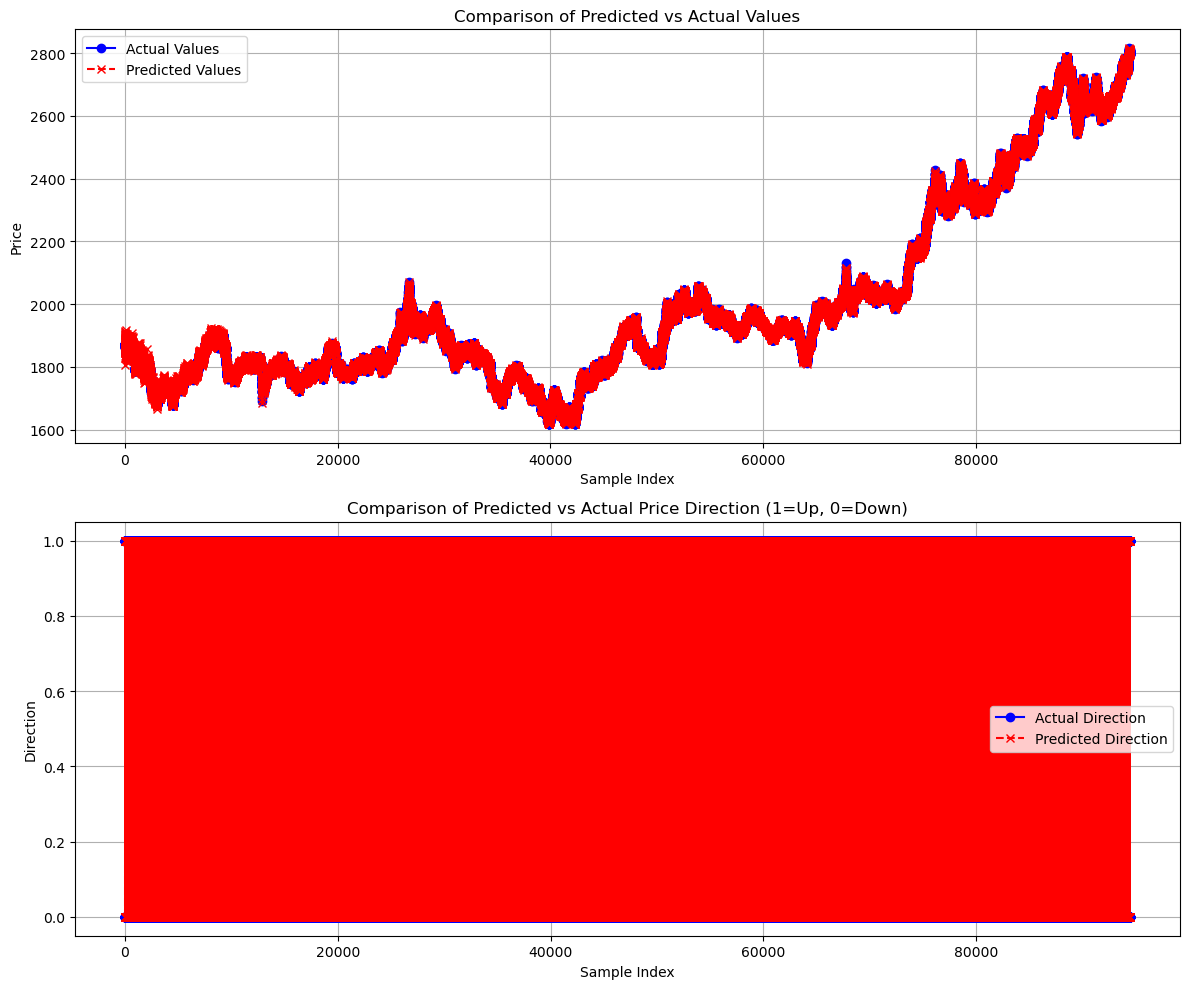

Iteration 1:
MAE: 1.8727288145963359
MAPE: 0.0009728242909695346
Price Accuracy: 0.9990271757090304
Direction Accuracy: 0.4868776268566649


Final Results:
Mean Absolute Error = 1.8727288145963359
Mean Absolute Percentage Error = 0.0009728242909695346
Price Accuracy = 0.9990271757090304
Direction Accuracy = 0.4868776268566649


In [102]:
print("Starting model training and evaluation...")
mae, mape, acc, dir_acc, preds, model = run_model(1)

print("\nFinal Results:")
print(f"Mean Absolute Error = {mae}")
print(f"Mean Absolute Percentage Error = {mape}")
print(f"Price Accuracy = {acc}")
print(f"Direction Accuracy = {dir_acc}")

In [41]:
def evalu(predictions, y_test_original):
    mae = mean_absolute_error(y_test_original, predictions)
    mape = mean_absolute_percentage_error(y_test_original, predictions)

    # Calculate direction accuracy
    dir_acc, actual_dir, pred_dir = calculate_direction_accuracy(y_test_original, predictions)
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")
    print(f"Price Accuracy: {1 - mape}")
    print(f"Direction Accuracy: {dir_acc}\n")

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot 1: Price predictions
    ax1.plot(y_test_original, label="Actual Values", color="blue", marker='o')
    ax1.plot(predictions, label="Predicted Values", color="red",
            linestyle='dashed', marker='x')
    ax1.set_title("Comparison of Predicted vs Actual Values")
    ax1.set_xlabel("Sample Index")
    ax1.set_ylabel("Price")
    ax1.legend()
    ax1.grid(True)

    # Plot 2: Direction predictions
    ax2.plot(actual_dir, label="Actual Direction", color="blue", marker='o')
    ax2.plot(pred_dir, label="Predicted Direction", color="red",
            linestyle='dashed', marker='x')
    ax2.set_title("Comparison of Predicted vs Actual Price Direction (1=Up, 0=Down)")
    ax2.set_xlabel("Sample Index")
    ax2.set_ylabel("Direction")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


MAE: 1.5053646484375076
MAPE: 0.0005374523652324295
Price Accuracy: 0.9994625476347676
Direction Accuracy: 0.48484848484848486



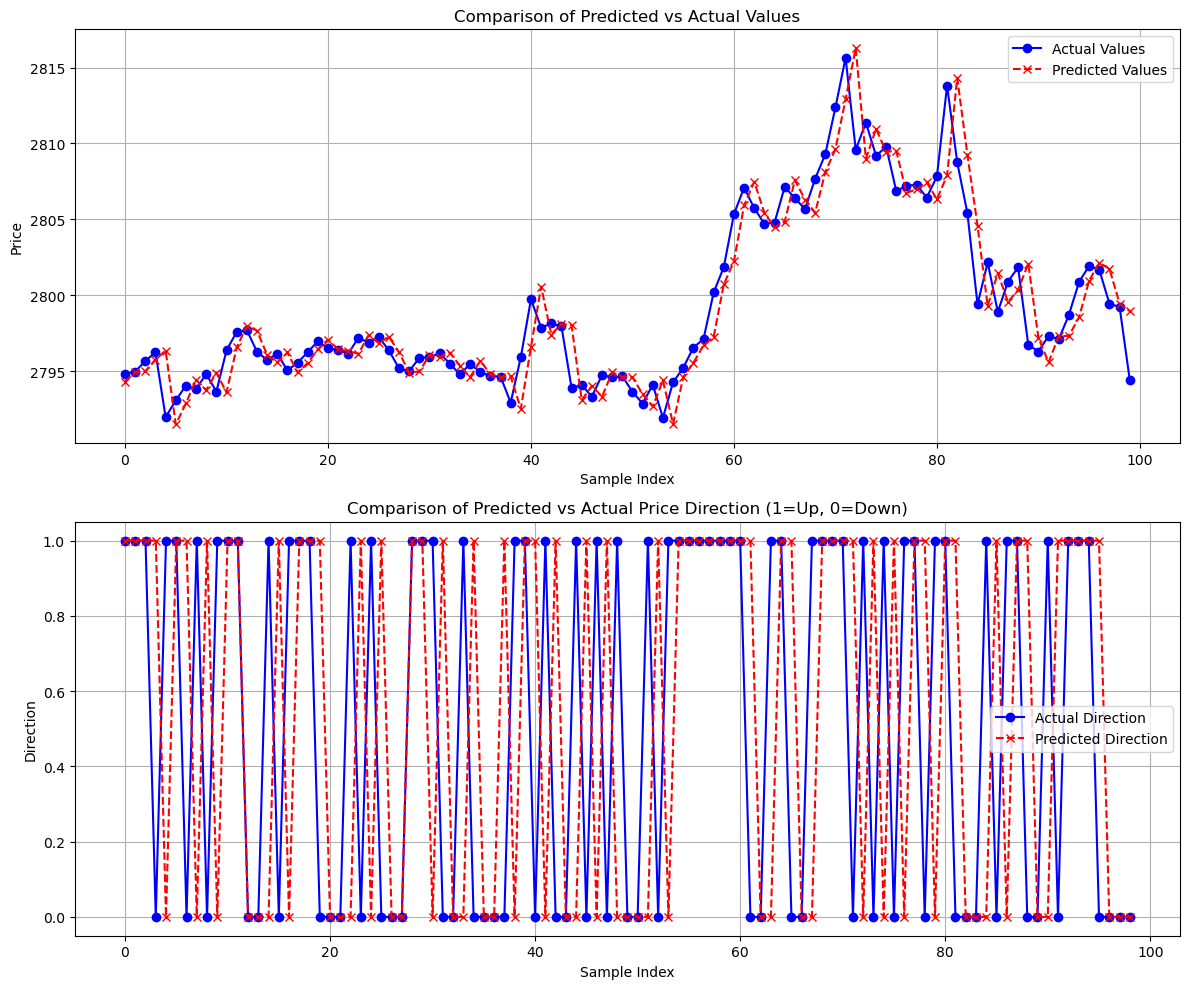

In [103]:
preds = np.array(preds)
evalu(preds[-100:], y_test_original[-100:])


# Testing the load model


In [78]:
# Load and use the model saved after the whole process
def use_final_model(data, iteration=0):
    # Load the model
    model = load_model(f'model_after_process_iter_{iteration}.h5')
    
    # Prepare your data
    input_data = data.reshape(1, sequence_length)
    
    # Make prediction
    prediction = model.predict(input_data, verbose=0)
    
    # Transform prediction back to original scale
    result = scaler.inverse_transform(prediction.reshape(-1, 1))
    
    return result

# Example usage:
# Assuming you have some new data to predict
# print(preds[-1])
new_data = X_test[-1]  # Just an example


# Using the model saved after the whole process
prediction2 = use_final_model(new_data, iteration=0)
print("Prediction using model after whole process:", prediction2)


Prediction using model after whole process: [[2702.806]]


In [108]:
print("\nFinal Results:")
print(preds[-1])
print(preds[-2])



Final Results:
[2798.95703125]
[2799.45458984]


In [115]:
def load_data():
        
    # Load the test dataset
    test_data = pd.read_csv("test.csv")  # Your new test data file

    # Convert the 'datetime' column to datetime format
    # test_data['datetime'] = pd.to_datetime(test_data['datetime'])

    # Sort the data by datetime (if not already sorted)
    # test_data = test_data.sort_values(by='datetime')

    # Extract only the 'close' column
    test_close_prices = test_data['Close'].values.reshape(-1, 1)  # Reshape to 2D array for scaling

    # Create a new scaler for the test data
    # Note: In practice, you should use the same scaler that was fit on your training data
    scaler = load('scaler.joblib')

    test_scaled = scaler.fit_transform(test_close_prices)

    # Define sequence length (same as in your original code)

    # Create sequences for testing data
    X_test_new = []
    y_test_new = []
    for i in range(len(test_scaled) - sequence_length):
        X_test_new.append(test_scaled[i:i + sequence_length].flatten())  # Flatten the sequence
        y_test_new.append(test_scaled[i + sequence_length])
    X_test_new = np.array(X_test_new)
    y_test_new = np.array(y_test_new)

    # If you need the original values
    y_test_new_original = scaler.inverse_transform(y_test_new.reshape(-1, 1))

    # Print shapes to verify
    print("X_test_new shape:", X_test_new.shape)
    print("y_test_new shape:", y_test_new.shape)
    return X_test_new, y_test_new, y_test_new_original, scaler, test_data

    

In [195]:
def load_data1():
    stock_data = pd.read_csv("15m_data_from_14_3_to_22_3 .csv", delimiter=",")
    # stock_data = pd.read_csv("test.csv", delimiter=";")


    # Convert the 'Date' column to datetime format
    # stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y.%m.%d %H:%M')

    # Sort the data by date (if not already sorted)
    # stock_data = stock_data.sort_values(by='Date')

    # Extract only the 'Close' column
    close_prices = stock_data['close'].values.reshape(-1, 1) 
    # close_prices = stock_data['Close'].values.reshape(-1, 1)  # Reshape to 2D array for scaling
     # Reshape to 2D array for scaling
    # print(close_prices)

    # Split the data into training and testing sets
    # train = close_prices[:train_examples]
    # test = close_prices[train_examples:]

    # len_train = len(train)
    # len_test = len(test)

    # Scale the data
    # scaler = MinMaxScaler(feature_range=(0, 1))
    # train_scaled = scaler.fit_transform(train)
    # test_scaled = scaler.transform(test)


    # Save the scaler
    # dump(scaler, 'scaler.joblib')
    test_scaled = scaler.transform(close_prices)



    # Define sequence length (same as in the original code)
    # sequence_length = 60  # Example value, adjust as needed

    # Create sequences for training data


    # Create sequences for testing data
    X_test_new = []
    y_test_new = []
    len_test = len(test_scaled)
    for i in range(len_test - sequence_length):
        X_test_new.append(test_scaled[i:i + sequence_length].flatten())  # Flatten the sequence
        y_test_new.append(test_scaled[i + sequence_length])
    X_test_new = np.array(X_test_new)
    y_test_new = np.array(y_test_new)
    y_test_new_original = scaler.inverse_transform(y_test_new.reshape(-1, 1))
    return X_test_new, y_test_new, y_test_new_original, scaler, close_prices


In [190]:
X_test_new, y_test_new, y_test_new_original, scaler, test_data = load_data1()

In [193]:
print(X_test[-1])
print("======")
print(X_test_new[-1])
print("======")
print(scaler.inverse_transform(X_test[-1].reshape(-1, 1)))
print("======")
print(scaler.inverse_transform(X_test_new[-1].reshape(-1, 1)))


[1.42961261 1.43187429 1.43076122 1.43092699 1.43082042 1.42841073
 1.42852322 1.42807325 1.42891398 1.42882517 1.42886069 1.42826863
 1.4278009  1.42854098 1.42725028 1.42862979 1.42919817 1.42998561
 1.43031717 1.4321348  1.43312355 1.43518984 1.43622003 1.43542075
 1.43481092 1.43485829 1.43624964 1.43581743 1.43537931 1.43656935
 1.43752257 1.43935205 1.44128217 1.43770019 1.43875406 1.43746929
 1.43781268 1.43607794 1.43630292 1.43632661 1.43583519 1.43665816
 1.4401987  1.43720878 1.43523129 1.43167299 1.43330709 1.43137696
 1.43256109 1.4331117  1.4300981  1.42983168 1.4304415  1.43030533
 1.43125855 1.43254332 1.43317091 1.43301105 1.43169667 1.43156642]
[1.42784235 1.42961261 1.43187429 1.43076122 1.43092699 1.43082042
 1.42841073 1.42852322 1.42807325 1.42891398 1.42882517 1.42886069
 1.42826863 1.4278009  1.42854098 1.42725028 1.42862979 1.42919817
 1.42998561 1.43031717 1.4321348  1.43312355 1.43518984 1.43622003
 1.43542075 1.43481092 1.43485829 1.43624964 1.43581743 1.435

MAE: 235.75585163288292
MAPE: 0.0776764168267491
Price Accuracy: 0.9223235831732509
Direction Accuracy: 0.5030120481927711



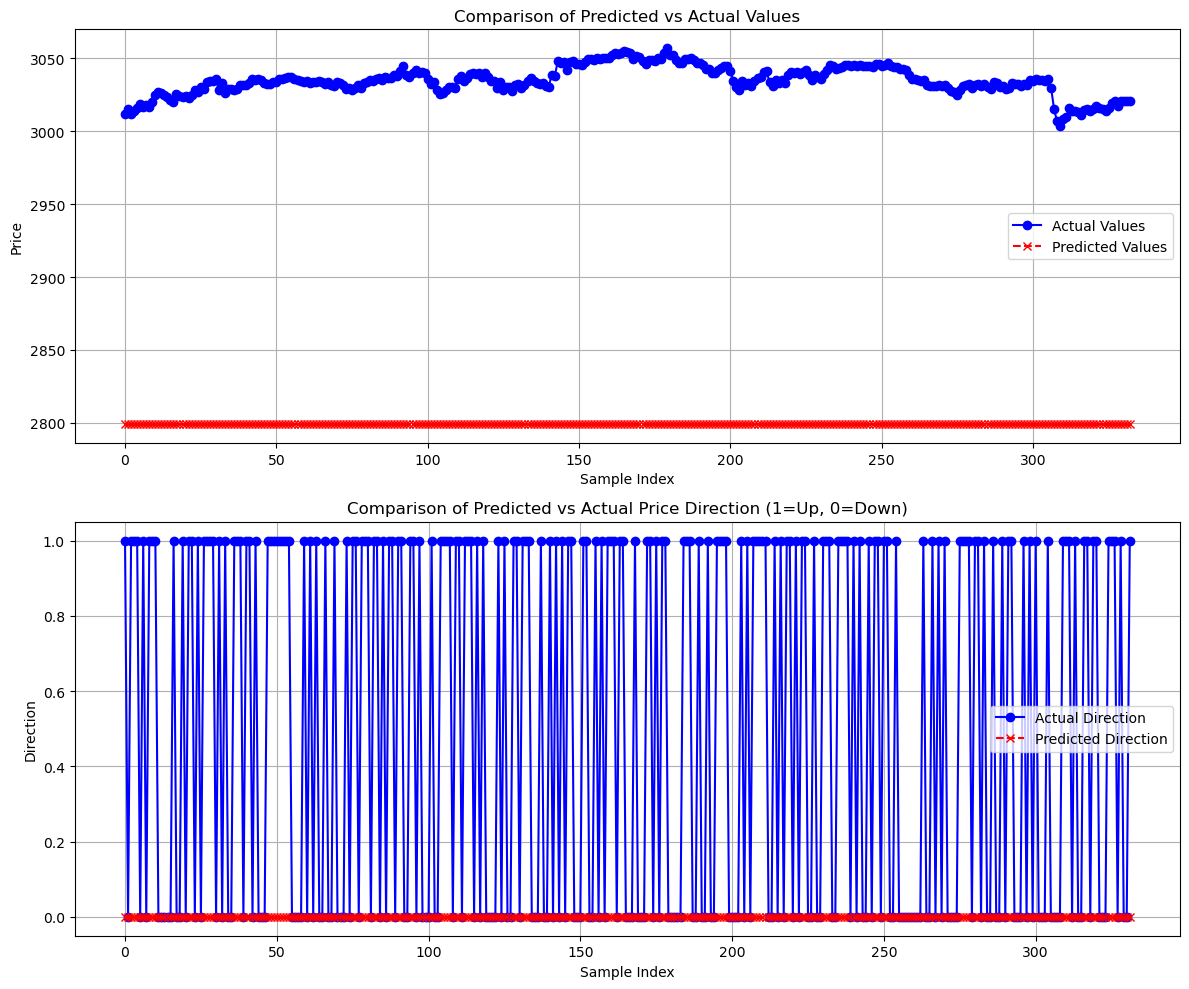

In [196]:


# model = load_model('model_after(split.8)_process_iter_0.h5')
# Assuming your new test data is already preprocessed as X_test_new from the previous code
# and your model is already loaded as 'model'
X_test_new, y_test_new, y_test_new_original, scaler, test_data = load_data1()

# Initialize array for results
results_new = np.zeros((len(X_test_new), 1))



# Make predictions
for j in range(len(X_test_new)):
    current_input = X_test_new[j].reshape(1, sequence_length)
    prediction = model.predict(current_input, verbose=0)
    results_new[j] = scaler.inverse_transform(prediction.reshape(-1, 1))

# # # Print some results
# # print("Predictions shape:", results_new.shape)
# # print("\nFirst few predictions:")
# # print(results_new[:5])

# # # If you want to compare with actual values
# print(test_data)
actual_prices = test_data[sequence_length:]
# # print("\nActual vs Predicted:")
# # for i in range(5):  # Print first 5 comparisons
# #     print(f"Actual: {actual_prices[i]:.2f}, Predicted: {results_new[i][0]:.2f}")




evalu(results_new, actual_prices)

In [186]:
print(X_test_new)
print("======")
print(scaler.inverse_transform(X_test_new.reshape(-1, 1)))

[[1.54356398 1.54640588 1.54924186 ... 1.55753962 1.55491975 1.55843956]
 [1.54640588 1.54924186 1.55034014 ... 1.55491975 1.55843956 1.55757219]
 [1.54924186 1.55034014 1.54971255 ... 1.55843956 1.55757219 1.55950231]
 ...
 [1.56859936 1.56917366 1.56813163 ... 1.56267873 1.56080485 1.56288595]
 [1.56917366 1.56813163 1.56675212 ... 1.56080485 1.56288595 1.56265209]
 [1.56813163 1.56675212 1.56653602 ... 1.56288595 1.56265209 1.56263136]]
[[2988.395]
 [2993.195]
 [2997.985]
 ...
 [3021.03 ]
 [3020.635]
 [3020.6  ]]


In [198]:
print(preds[-100:])

[[2794.32666016]
 [2794.94067383]
 [2795.00097656]
 [2795.77368164]
 [2796.36767578]
 [2791.50292969]
 [2792.88378906]
 [2794.44580078]
 [2793.75390625]
 [2794.90869141]
 [2793.60400391]
 [2796.56689453]
 [2797.98706055]
 [2797.67993164]
 [2796.08691406]
 [2795.58642578]
 [2796.24047852]
 [2794.92602539]
 [2795.54858398]
 [2796.4387207 ]
 [2797.08349609]
 [2796.44067383]
 [2796.34667969]
 [2796.15087891]
 [2797.38085938]
 [2796.8503418 ]
 [2797.27832031]
 [2796.25097656]
 [2794.91796875]
 [2794.98779297]
 [2796.06420898]
 [2795.92626953]
 [2796.23291016]
 [2795.37255859]
 [2794.61669922]
 [2795.67456055]
 [2794.83642578]
 [2794.60107422]
 [2794.66821289]
 [2792.53076172]
 [2796.6003418 ]
 [2800.58203125]
 [2797.41943359]
 [2798.12255859]
 [2798.03051758]
 [2793.10400391]
 [2794.046875  ]
 [2793.33154297]
 [2794.92724609]
 [2794.63891602]
 [2794.60717773]
 [2793.49291992]
 [2792.68383789]
 [2794.39746094]
 [2791.52954102]
 [2794.60961914]
 [2795.55419922]
 [2796.70507812]
 [2797.2690429